In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import os

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Задание № 1.  
Прочитайте базу "Потребление Энергии" (или BRENT(сделать анализ пропусков и больше чем 2-х дневные заполнить, и работаем для 3-х дневного ресемплинга), или COVID-19(выбрать любую страну кроме Бразилии)) и сделайте модель основных изменений по data_exp_1(сглаженной) с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" . 


In [2]:
path = 'my_PJME_MW.csv'
data =  pd.read_csv('my_PJME_MW.csv')
data.sample(5) 

,Date,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
144910,2018-07-14,17:00:00,44380.0,2018,7,14,3,195,28,5,17,0,0,0
76415,2010-09-20,17:00:00,35103.0,2010,9,20,3,263,38,0,17,0,0,0
88524,2012-02-07,10:00:00,33569.0,2012,2,7,1,38,6,1,10,0,0,0
105563,2014-01-17,13:00:00,33587.0,2014,1,17,1,17,3,4,13,0,0,0
42466,2006-11-05,21:00:00,32554.0,2006,11,5,4,309,44,6,21,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145374 entries, 0 to 145373
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             145374 non-null  object 
 1   Time             145374 non-null  object 
 2   PJME_MW          145374 non-null  float64
 3   year             145374 non-null  int64  
 4   month            145374 non-null  int64  
 5   dayofmonth       145374 non-null  int64  
 6   quarter          145374 non-null  int64  
 7   dayofyear        145374 non-null  int64  
 8   weekofyear       145374 non-null  int64  
 9   dayofweek        145374 non-null  int64  
 10  hour             145374 non-null  int64  
 11  is_holiday       145374 non-null  int64  
 12  is_prev_holiday  145374 non-null  int64  
 13  is_next_holiday  145374 non-null  int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 15.5+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PJME_MW,145374.0,32079.773047,6464.167501,14544.0,27573.0,31421.0,35648.75,62009.0
year,145374.0,2009.801340,4.791885,2002.0,2006.0,2010.0,2014.00,2018.0
month,145374.0,6.435979,3.438982,1.0,3.0,6.0,9.00,12.0
dayofmonth,145374.0,15.722681,8.801258,1.0,8.0,16.0,23.00,31.0
quarter,145374.0,2.481241,1.114448,1.0,1.0,2.0,3.00,4.0
dayofyear,145374.0,180.459835,105.138073,1.0,90.0,179.0,271.00,366.0
weekofyear,145374.0,26.218643,15.019836,1.0,13.0,26.0,39.00,53.0
dayofweek,145374.0,2.999168,1.999572,0.0,1.0,3.0,5.00,6.0
hour,145374.0,11.501101,6.921927,0.0,6.0,12.0,18.00,23.0
is_holiday,145374.0,0.027233,0.162763,0.0,0.0,0.0,0.00,1.0


In [5]:
data.head(5) 

,Date,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
0,2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
1,2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2,2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
3,2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
4,2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


Text(0, 0.5, 'МВт')

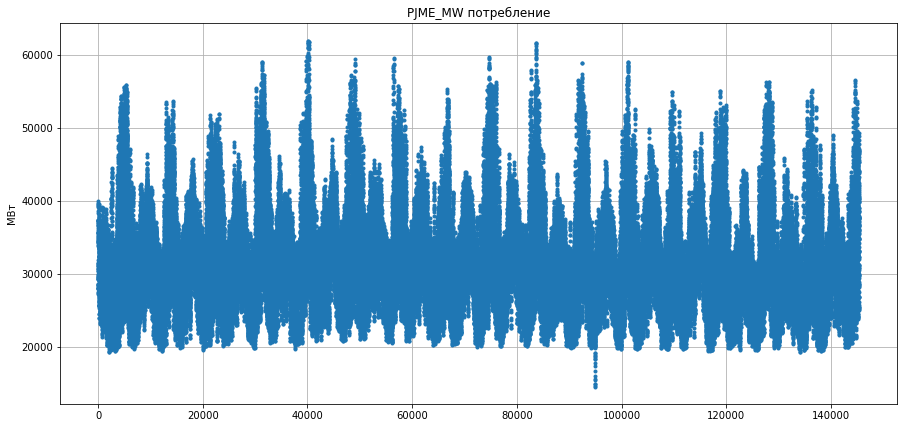

In [6]:
data['PJME_MW'].plot(style = '.', figsize = ( 15, 7 ), title = 'PJME_MW потребление', grid=True)
plt.ylabel ( 'МВт' )

Text(0, 0.5, 'МВт')

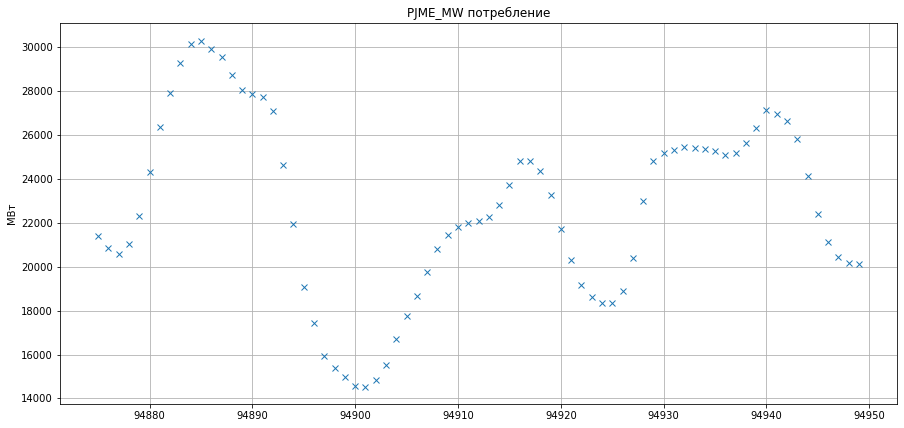

In [7]:
data['PJME_MW'][94875:94950].plot(style = 'x', figsize = ( 15, 7 ), title = 'PJME_MW потребление', grid=True)
plt.ylabel ( 'МВт' )

### Наблюдается провал в потреблении 29.10.2012, причинина видимо Ураган "Сэнди". Корректировать данные не будем. 

In [8]:
data['DT'] = data['Date'].astype(str) +' '+  data['Time'].astype(str)
data['DT'][0]

'2002-01-01 01:00:00'

In [9]:
data['DateTime'] = data['DT'].astype('datetime64[ns]')

In [10]:
data['DateTime'] 

0        2002-01-01 01:00:00
1        2002-01-01 02:00:00
2        2002-01-01 03:00:00
3        2002-01-01 04:00:00
4        2002-01-01 05:00:00
                 ...        
145369   2018-08-02 20:00:00
145370   2018-08-02 21:00:00
145371   2018-08-02 22:00:00
145372   2018-08-02 23:00:00
145373   2018-08-03 00:00:00
Name: DateTime, Length: 145374, dtype: datetime64[ns]

In [11]:
data = data.set_index('DateTime')

In [12]:
data['DateTime_'] = data.index

In [13]:
data = data.sort_values(by ='DateTime_', ascending = 1)
data.head(5)

,Date,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday,DT,DateTime_
DateTime,,,,,,,,,,,,,,,,
2002-01-01 01:00:00,2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0,2002-01-01 01:00:00,2002-01-01 01:00:00
2002-01-01 02:00:00,2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0,2002-01-01 02:00:00,2002-01-01 02:00:00
2002-01-01 03:00:00,2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0,2002-01-01 03:00:00,2002-01-01 03:00:00
2002-01-01 04:00:00,2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0,2002-01-01 04:00:00,2002-01-01 04:00:00
2002-01-01 05:00:00,2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0,2002-01-01 05:00:00,2002-01-01 05:00:00


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145374 entries, 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145374 non-null  object        
 1   Time             145374 non-null  object        
 2   PJME_MW          145374 non-null  float64       
 3   year             145374 non-null  int64         
 4   month            145374 non-null  int64         
 5   dayofmonth       145374 non-null  int64         
 6   quarter          145374 non-null  int64         
 7   dayofyear        145374 non-null  int64         
 8   weekofyear       145374 non-null  int64         
 9   dayofweek        145374 non-null  int64         
 10  hour             145374 non-null  int64         
 11  is_holiday       145374 non-null  int64         
 12  is_prev_holiday  145374 non-null  int64         
 13  is_next_holiday  145374 non-null  int64 

In [15]:
# проверим пропуски
data['PJME_MW'].isnull().sum()

0

In [18]:
# Посмотрим на количество измерений в каждый час
count_data = data['DateTime_'].value_counts()
count_data.head()

2014-11-02 02:00:00    3
2015-11-01 02:00:00    3
2016-11-06 02:00:00    3
2017-11-05 02:00:00    3
2012-08-16 00:00:00    1
Name: DateTime_, dtype: int64

In [22]:
anomal_date2014= data['2014-11-02 00:00:00':'2014-11-02 23:00:00'].index.tolist()
anomal_date2015= data['2015-11-01 00:00:00':'2015-11-01 23:00:00'].index.tolist()
anomal_date2016= data['2016-11-06 00:00:00':'2016-11-06 23:00:00'].index.tolist()
anomal_date2017= data['2017-11-05 00:00:00':'2017-11-05 23:00:00'].index.tolist()

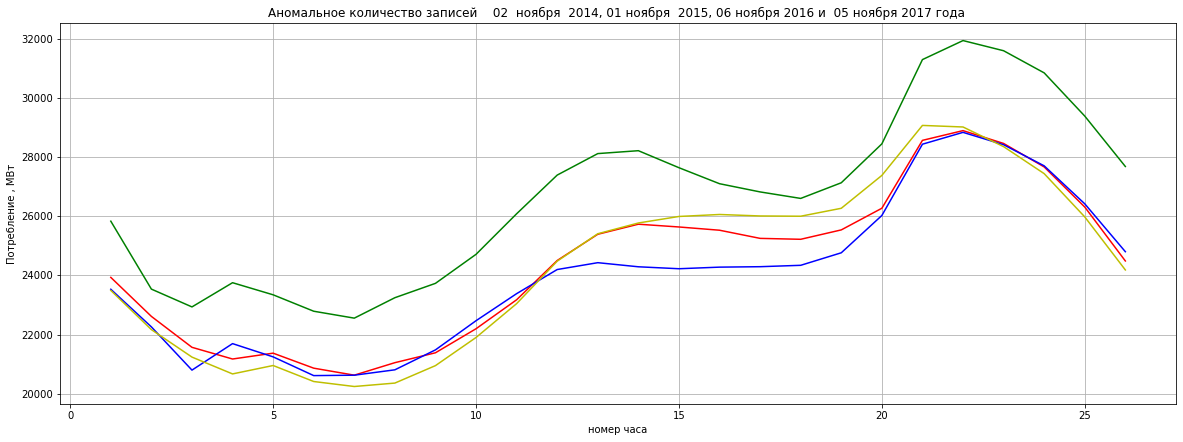

In [23]:
plt.figure(figsize=(20,7))
plt.plot(np.arange(1,len(anomal_date2014)+1) ,data[anomal_date2014[0]:anomal_date2014[-1]]['PJME_MW'].values, 'g')
plt.plot(np.arange(1,len(anomal_date2015)+1) ,data[anomal_date2015[0]:anomal_date2015[-1]]['PJME_MW'].values, 'r')
plt.plot(np.arange(1,len(anomal_date2016)+1) ,data[anomal_date2016[0]:anomal_date2016[-1]]['PJME_MW'].values, 'b')
plt.plot(np.arange(1,len(anomal_date2017)+1) ,data[anomal_date2017[0]:anomal_date2017[-1]]['PJME_MW'].values, 'y')
plt.grid()
plt.xlabel('номер часа')
plt.ylabel('Потребление , МВт')
plt.title('Аномальное количество записей    02  ноября  2014, 01 ноября  2015, 06 ноября 2016 и  05 ноября 2017 года ')

plt.show()

#### Осталось не очевидным  в чем причина появления дублирующихся записей ((

In [24]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [25]:
# Ресампл по дням
d_data=data.resample('3D').mean()
d_data

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
DateTime,,,,,,,,,,,,
2002-01-01,33315.760563,2002.0,1.000000,2.014085,1.0,2.014085,1.000000,2.014085,11.661972,0.323944,0.0,0.338028
2002-01-04,31481.388889,2002.0,1.000000,5.000000,1.0,5.000000,1.000000,5.000000,11.500000,0.000000,0.0,0.000000
2002-01-07,33824.305556,2002.0,1.000000,8.000000,1.0,8.000000,2.000000,1.000000,11.500000,0.000000,0.0,0.000000
2002-01-10,30295.319444,2002.0,1.000000,11.000000,1.0,11.000000,2.000000,4.000000,11.500000,0.000000,0.0,0.000000
2002-01-13,30293.194444,2002.0,1.000000,14.000000,1.0,14.000000,2.666667,2.333333,11.500000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-21,32649.458333,2018.0,7.000000,22.000000,3.0,203.000000,29.333333,3.666667,11.500000,0.000000,0.0,0.000000
2018-07-24,37888.736111,2018.0,7.000000,25.000000,3.0,206.000000,30.000000,2.000000,11.500000,0.000000,0.0,0.000000
2018-07-27,34950.055556,2018.0,7.000000,28.000000,3.0,209.000000,30.000000,5.000000,11.500000,0.000000,0.0,0.000000


In [26]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [27]:
data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.1)

Text(0.5, 1.0, 'PJME_MW')

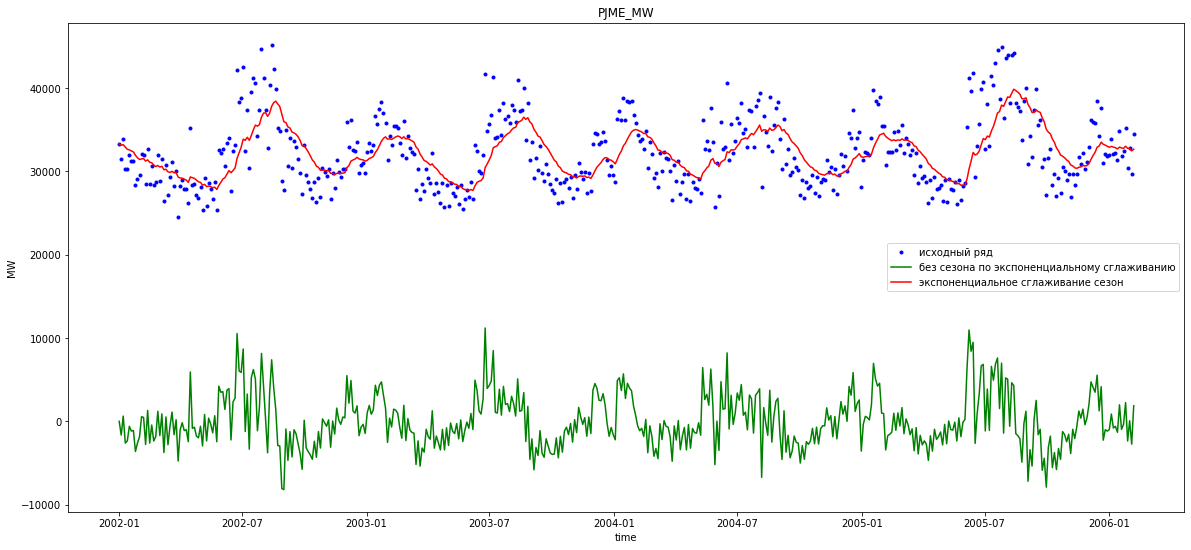

In [28]:
plt.figure(figsize=(20, 9))
plt.plot(d_data.index[:500], d_data['PJME_MW'].values[:500], '.b',label='исходный ряд')

plt.plot(d_data.index[:500],d_data['PJME_MW'].values[:500] - data_exp_1[:500] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[:500],data_exp_1[:500] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

In [29]:
data_seson_free = pd.DataFrame(data = (np.array(d_data['PJME_MW']).reshape((d_data['PJME_MW'].shape[0],1)) -data_exp_1))
DF_ = sm.tsa.stattools.adfuller( data_seson_free.iloc[:,0] , regression = 'ctt')
DF_

(-13.696746231471133,
 2.4569465041055724e-22,
 26,
 1993,
 {'1%': -4.376953510538298,
  '5%': -3.8353563806890913,
  '10%': -3.555097567384269},
 36749.27984647691)

In [83]:
#Моделировать будем по разностному ряду 
df = pd.DataFrame(data=data_exp_1, index=d_data.index)
df.head()

,0
DateTime,
2002-01-01,33315.760563
2002-01-04,33132.323396
2002-01-07,33201.521612
2002-01-10,32910.901395
2002-01-13,32649.130700


In [84]:
 # добавили историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0.0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0.0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0.0
df.iloc[3:,3]=df.iloc[:-3,0].values
df['t5']=0.0
df.iloc[5:,4]=df.iloc[:-5,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.05)
df['exp_0_08'] = exponential_smoothing(df[0], 0.1)
# добавим разности - 1-й порядок
df['diff1'] = 0.0
df['diff1'].iloc[1:] = df.iloc[:-1,0].values-df.iloc[1:,0].values


df.head(12)

,0,t,t1,t2,t5,exp_0_01,exp_0_03,exp_0_08,diff1
DateTime,,,,,,,,,
2002-01-01,33315.760563,0.000000,0.000000,0.000000,0.000000,33315.760563,33315.760563,33315.760563,0.000000
2002-01-04,33132.323396,33315.760563,0.000000,0.000000,0.000000,33313.926192,33306.588705,33297.416847,183.437167
2002-01-07,33201.521612,33132.323396,33315.760563,0.000000,0.000000,33312.802146,33301.335350,33287.827323,-69.198216
2002-01-10,32910.901395,33201.521612,33132.323396,33315.760563,0.000000,33308.783138,33281.813653,33250.134730,290.620217
2002-01-13,32649.130700,32910.901395,33201.521612,33132.323396,0.000000,33302.186614,33250.179505,33190.034327,261.770695
2002-01-16,32582.023186,32649.130700,32910.901395,33201.521612,33315.760563,33294.984980,33216.771689,33129.233213,67.107514
2002-01-19,32451.959756,32582.023186,32649.130700,32910.901395,33132.323396,33286.554727,33178.531092,33061.505867,130.063430
2002-01-22,32328.420725,32451.959756,32582.023186,32649.130700,33201.521612,33276.973387,33136.025574,32988.197353,123.539031
2002-01-25,31925.781430,32328.420725,32451.959756,32582.023186,32910.901395,33263.461468,33075.513367,32881.955761,402.639295


In [85]:
df.columns

Index([0, 't', 't1', 't2', 't5', 'exp_0_01', 'exp_0_03', 'exp_0_08', 'diff1'], dtype='object')

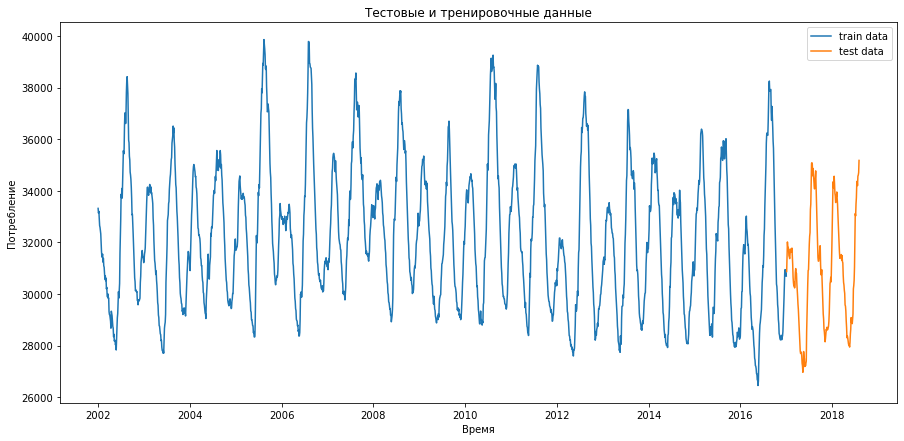

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('DateTime') <= split_date].copy(), \
           data.loc[data.index.get_level_values('DateTime') >  split_date].copy()

train_b, test_b = split_data_b( df, '01-01-2017')

X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df.columns[0]].values[1:]
X_test_b = test_b.iloc[:-1,:]
y_test_b = test_b[df.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление')
plt.plot(train_b.index.get_level_values('DateTime'),train_b[df.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('DateTime'),test_b[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

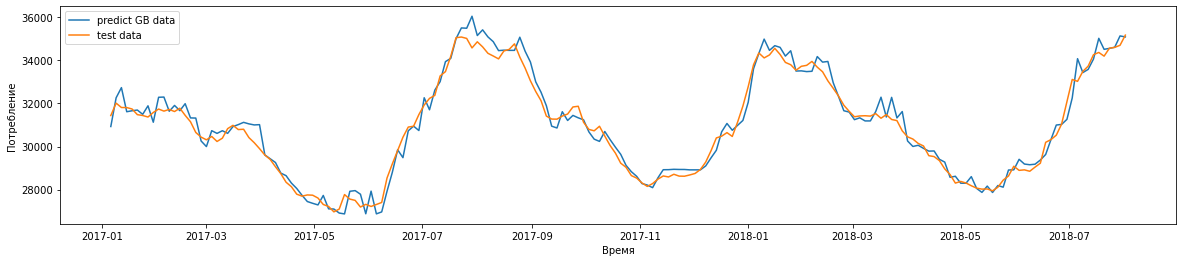

ошибка градиентного бустинга :   1.080641072768704 %


In [87]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[1:],y_test_b, label='test data')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

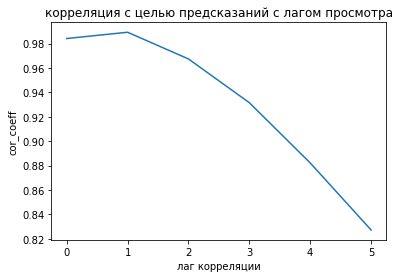

In [88]:
lag=5
p_cor=[np.corrcoef( y_test_b, X_test_pred_gb)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test_b[:-(i+1)], X_test_pred_gb[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) ) 
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

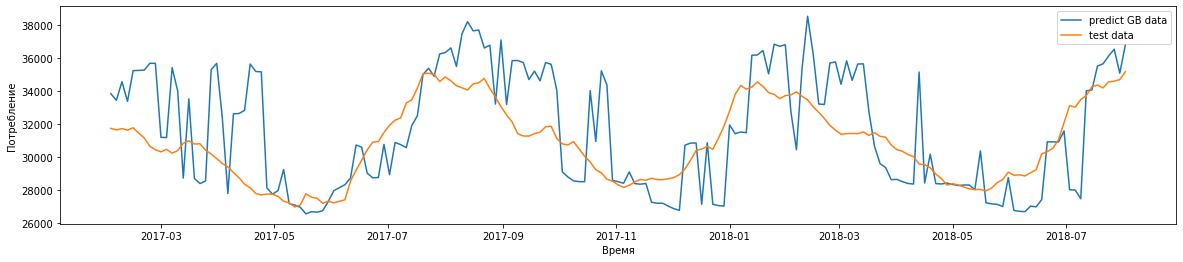

ошибка градиентного бустинга :   6.918876427451936 %


In [89]:
h=10
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df.columns[0]].values[h:]

model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')


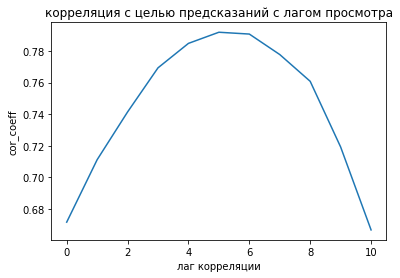

In [90]:
lag=10
p_cor=[np.corrcoef( y_test_b, X_test_pred_gb)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test_b[:-(i+1)], X_test_pred_gb[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) ) 
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

### Задача 2.  
Оцените ошибку модели из п.1   
#### Решение.  
На маленьком периоде предсказания модель дает более точные предсказания  

### Задача 3.  
Сделайте вывод о том, как изменилась ошибка модели по значениям h.  
#### Решение.  
Ошибка модели при увеличении размера окна уменьшилась. 

### Задача 4.  
Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):
 - Изменение температуры за окном :). - *нет*
 - Количество денег, которые тратят покупатели в интернет магазине. - *скорее нет*
 - Вес растущего котенка. - *нет*
 - Прирост объема деревьев в лесу от времени - *думаю да. 